<a href="https://colab.research.google.com/github/rfps09/Colab-Backup/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rede Neural usando TensorFlow e keras para a porta lógica XOR

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

def create_model(numInput):
  model = Sequential()
  model.add(Dense(2,activation='relu',input_dim=numInput))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(2,activation='softmax'))
  model.compile('RMSprop', 'categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

model = create_model(2)

X_gym = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_gym = np.array([0,1,1,0])

X_game = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_game = np.array([0,1,1,0])

Y_gym = to_categorical(Y_gym)
Y_game = to_categorical(Y_game)

model.fit(X_gym,Y_gym,epochs=500)

y_pred = model.predict(X_game)
print(y_pred)
y = y_pred.argmax(axis=1)
print(y)

Rede Neural para classificar iris

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#Carregando os dados
X = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/iris.data', delimiter=',')
X = np.delete(X,4,1)
Y = np.array([0,1,2])
Y = np.repeat(Y,50)

#Separando os dados
X_gym, X_game, Y_gym, Y_game = train_test_split(X,Y,test_size=0.2,random_state=123, stratify=Y)

Y_gym = to_categorical(Y_gym,num_classes = 3)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_model(numInput):
  model = Sequential()
  model.add(Dense(10,activation='elu', input_dim=numInput))
  model.add(Dense(3,activation='softmax'))
  model.compile('Adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

model = create_model(4)

history = model.fit(X_gym,Y_gym,epochs=100, validation_split=.1,verbose=2)

Epoch 1/100
4/4 - 1s - loss: 2.5823 - categorical_accuracy: 0.3426 - val_loss: 2.2995 - val_categorical_accuracy: 0.4167 - 516ms/epoch - 129ms/step
Epoch 2/100
4/4 - 0s - loss: 2.4848 - categorical_accuracy: 0.3611 - val_loss: 2.2386 - val_categorical_accuracy: 0.3333 - 29ms/epoch - 7ms/step
Epoch 3/100
4/4 - 0s - loss: 2.3894 - categorical_accuracy: 0.3426 - val_loss: 2.1685 - val_categorical_accuracy: 0.2500 - 33ms/epoch - 8ms/step
Epoch 4/100
4/4 - 0s - loss: 2.2987 - categorical_accuracy: 0.3426 - val_loss: 2.0927 - val_categorical_accuracy: 0.2500 - 29ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 2.2064 - categorical_accuracy: 0.3426 - val_loss: 2.0039 - val_categorical_accuracy: 0.2500 - 30ms/epoch - 8ms/step
Epoch 6/100
4/4 - 0s - loss: 2.1114 - categorical_accuracy: 0.3426 - val_loss: 1.9117 - val_categorical_accuracy: 0.2500 - 33ms/epoch - 8ms/step
Epoch 7/100
4/4 - 0s - loss: 2.0164 - categorical_accuracy: 0.3426 - val_loss: 1.8212 - val_categorical_accuracy: 0.2500 - 40ms

Gráficos

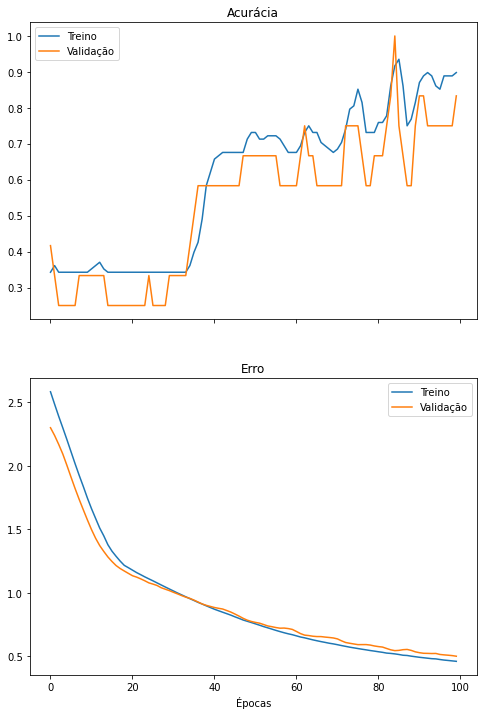

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_categorical_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)

Área para salvar o modelo, caso o treinamento tenha sido bom

In [ ]:
model.save('drive/MyDrive/TensorFlow/Models/Iris/Pessimo')

Teste

In [ ]:
y_pred = model.predict(X_game)
iris_pred = y_pred.argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


Matriz de confusão

In [ ]:
 #Matriz de confusão já com 3 classes:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

matriz_confusao = confusion_matrix(Y_game, iris_pred, labels=[0,1,2])
print(matriz_confusao)

[[10  0  0]
 [ 0  5  5]
 [ 0  0 10]]


Métricas

In [ ]:
#https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print('Precision or positive predictive: %.3f' % precision_score(Y_game,iris_pred,average='weighted',zero_division=1))
print('Recall or Sensitivity: %.3f' % recall_score(Y_game, iris_pred,average='weighted',zero_division=1))
print('Accuracy: %.3f' % accuracy_score(Y_game, iris_pred))
print('F1 Score: %.3f' % f1_score(Y_game, iris_pred,average='weighted',zero_division=1))
print('Precision Recall F1-Score Support for each class:')
#print(precision_recall_fscore_support(lista_classes_originais, lista_classes_preditas,average='weighted',labels=[0,1,2,3]))
precision, recall, fscore, support = precision_recall_fscore_support(Y_game, iris_pred,
    zero_division=1)
print('precision or positive predictive: {}'.format(precision))
print('recall or sensitivity: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#The diagonal entries are the accuracies of each class
matriz_confusao = matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis]
acuracia_classes = matriz_confusao.diagonal()
print('Accuracy for each class:')
print(acuracia_classes)

class_names=['N','S','V']
print(classification_report(Y_game, iris_pred, target_names=class_names,zero_division=1))

Precision or positive predictive: 0.933
Recall or Sensitivity: 0.933
Accuracy: 0.933
F1 Score: 0.933
Precision Recall F1-Score Support for each class:
precision or positive predictive: [1.         0.83333333 0.90909091]
recall or sensitivity: [1.         0.83333333 0.90909091]
fscore: [1.         0.83333333 0.90909091]
support: [13  6 11]
Accuracy for each class:
[1.         0.83333333 0.90909091]
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        13
           S       0.83      0.83      0.83         6
           V       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



Rede Neural para classificar levedura

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Yeast/yeast.data')
X = np.delete(X,[0,9],axis=1)
Y = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Yeast/yeast.data', dtype=str,usecols=9)
Y = np.unique(Y,return_inverse=1)[1]

X_gym, X_game, Y_gym, Y_game = train_test_split(X,Y,test_size=0.15,stratify=Y)

Y_gym_onehot = to_categorical(Y_gym)

X_gym = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Yeast/X_gym.csv', delimiter=',')
X_game = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Yeast/X_game.csv', delimiter=',')
Y_gym = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Yeast/Y_gym.csv', delimiter=',')
Y_gym_onehot = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Yeast/Y_gym_onehot.csv', delimiter=',')
Y_game = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Yeast/Y_game.csv', delimiter=',')

classes = 10

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_gym_onehot = to_categorical(Y_gym)

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
print(classes)

10


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def create_model(numInputs):
  model = Sequential()
  model.add(Dense(numInputs,activation='relu', input_dim=numInputs))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(classes,activation='softmax',))
  optimizer = keras.optimizers.Adam(learning_rate=0.003)
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model = create_model(8)

history = model.fit(X_gym, Y_gym_onehot, batch_size=32, validation_split=0.2, epochs=500, callbacks=[callback], verbose=2)

Epoch 1/500
32/32 - 1s - loss: 2.1935 - accuracy: 0.0853 - val_loss: 2.0720 - val_accuracy: 0.2964 - 1s/epoch - 33ms/step
Epoch 2/500
32/32 - 0s - loss: 1.9456 - accuracy: 0.2867 - val_loss: 1.8686 - val_accuracy: 0.2964 - 191ms/epoch - 6ms/step
Epoch 3/500
32/32 - 0s - loss: 1.7809 - accuracy: 0.2867 - val_loss: 1.7994 - val_accuracy: 0.2964 - 193ms/epoch - 6ms/step
Epoch 4/500
32/32 - 0s - loss: 1.7236 - accuracy: 0.3056 - val_loss: 1.7847 - val_accuracy: 0.2846 - 199ms/epoch - 6ms/step
Epoch 5/500
32/32 - 0s - loss: 1.6795 - accuracy: 0.3274 - val_loss: 1.7383 - val_accuracy: 0.3597 - 154ms/epoch - 5ms/step
Epoch 6/500
32/32 - 0s - loss: 1.6089 - accuracy: 0.3750 - val_loss: 1.6834 - val_accuracy: 0.4506 - 158ms/epoch - 5ms/step
Epoch 7/500
32/32 - 0s - loss: 1.5267 - accuracy: 0.4117 - val_loss: 1.5949 - val_accuracy: 0.4269 - 158ms/epoch - 5ms/step
Epoch 8/500
32/32 - 0s - loss: 1.4652 - accuracy: 0.4167 - val_loss: 1.5559 - val_accuracy: 0.4348 - 196ms/epoch - 6ms/step
Epoch 9/50

Gráficos

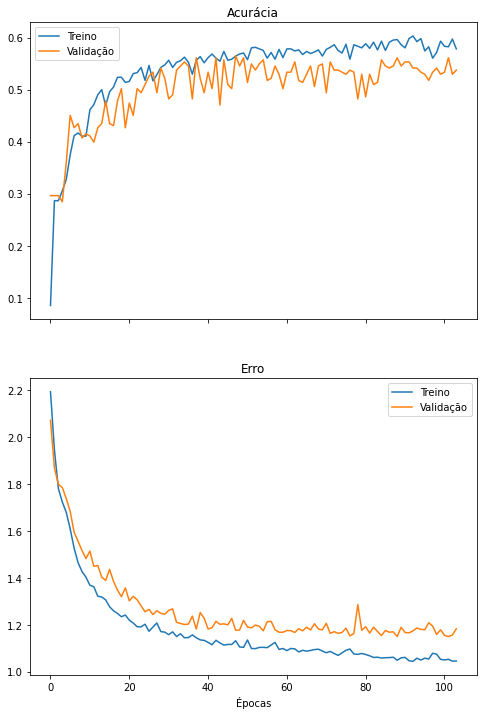

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)

Teste

In [ ]:
y = model.predict(X_game)
Y_pred = y.argmax(axis=1)

7/7 [==============================] - 0s 2ms/step


Matriz de confusão

In [ ]:
#Matriz de confusão já com 3 classes:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

matriz_confusao = confusion_matrix(Y_game, Y_pred, labels=range(int(classes)))
print(matriz_confusao)

[[45  0  0  1  0  2 13 13  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1  0  0  0  0  0]
 [ 0  0  1  6  0  0  0  0  0  0]
 [ 0  0  0  2  1  4  0  0  0  0]
 [ 0  0  0  0  0 19  0  1  0  0]
 [ 9  0  0  0  1  2 25  2  0  0]
 [28  0  0  0  0  6 11 20  0  0]
 [ 1  0  1  0  0  0  1  0  1  0]
 [ 2  0  0  0  0  0  1  0  0  0]]


In [ ]:
#https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print('Precision or positive predictive: %.3f' % precision_score(Y_game,Y_pred,average='weighted',zero_division=1))
print('Recall or Sensitivity: %.3f' % recall_score(Y_game, Y_pred,average='weighted',zero_division=1))
print('Accuracy: %.3f' % accuracy_score(Y_game, Y_pred))
print('F1 Score: %.3f' % f1_score(Y_game, Y_pred,average='weighted',zero_division=1))
print('Precision Recall F1-Score Support for each class:')
#print(precision_recall_fscore_support(lista_classes_originais, lista_classes_preditas,average='weighted',labels=[0,1,2,3]))
precision, recall, fscore, support = precision_recall_fscore_support(Y_game, Y_pred,
    zero_division=1)
print('precision or positive predictive: {}'.format(precision))
print('recall or sensitivity: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#The diagonal entries are the accuracies of each class
matriz_confusao = matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis]
acuracia_classes = matriz_confusao.diagonal()
print('Accuracy for each class:')
print(acuracia_classes)

print(classification_report(Y_game, Y_pred, zero_division=1))

Precision or positive predictive: 0.534
Recall or Sensitivity: 0.529
Accuracy: 0.529
F1 Score: 0.505
Precision Recall F1-Score Support for each class:
precision or positive predictive: [0.52941176 0.33333333 0.6        0.33333333 0.57575758 0.49019608
 0.55555556 0.5        1.        ]
recall or sensitivity: [0.6        0.33333333 0.85714286 0.14285714 0.95       0.64102564
 0.30769231 0.25       0.        ]
fscore: [0.5625     0.33333333 0.70588235 0.2        0.71698113 0.55555556
 0.3960396  0.33333333 0.        ]
support: [75  3  7  7 20 39 65  4  3]
Accuracy for each class:
[0.6               nan 0.33333333 0.85714286 0.14285714 0.95
 0.64102564 0.30769231 0.25       0.        ]
              precision    recall  f1-score   support

         0.0       0.53      0.60      0.56        75
         2.0       0.33      0.33      0.33         3
         3.0       0.60      0.86      0.71         7
         4.0       0.33      0.14      0.20         7
         5.0       0.58      0.95    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('drive/MyDrive/TensorFlow/Models/Yeast/SingleLayer')

Rede Neural para classificar shuttle

In [ ]:
#carregando os dados

import numpy as np
from tensorflow.keras.utils import to_categorical

data_treino = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Shuttle/shuttle.trn')
classe_treino = data_treino[:,len(data_treino[0])-1]
classe_treino = classe_treino - 1
data_treino = np.delete(data_treino,len(data_treino[0])-1,axis=1)

classe_treino_onehot = to_categorical(classe_treino)

data_teste = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/Shuttle/shuttle.tst')
classe_teste = data_teste[:,len(data_teste[0])-1] - 1
data_teste = np.delete(data_teste,len(data_teste[0])-1,axis=1)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(numInputs):
  model = Sequential()
  model.add(Dense(numInputs,activation='relu',input_dim=numInputs))
  model.add(Dense(7,activation='softmax'))
  model.compile('Adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

model = create_model(9)

history = model.fit(data_treino,classe_treino_onehot,epochs=35,validation_split=0.1)

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_categorical_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)


In [ ]:
classe_predita_onehot = model.predict(data_teste)
classe_predita = classe_predita_onehot.argmax(axis=1)

In [ ]:
#Matriz de confusão já com 3 classes:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

matriz_confusao = confusion_matrix(classe_teste, classe_predita, labels=range(7))
print(matriz_confusao)

In [ ]:
#https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print('Precision or positive predictive: %.3f' % precision_score(classe_teste,classe_predita,average='weighted',zero_division=1))
print('Recall or Sensitivity: %.3f' % recall_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Accuracy: %.3f' % accuracy_score(classe_teste, classe_predita))
print('F1 Score: %.3f' % f1_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Precision Recall F1-Score Support for each class:')
#print(precision_recall_fscore_support(lista_classes_originais, lista_classes_preditas,average='weighted',labels=[0,1,2,3]))
precision, recall, fscore, support = precision_recall_fscore_support(classe_teste, classe_predita,
    zero_division=1)
print('precision or positive predictive: {}'.format(precision))
print('recall or sensitivity: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#The diagonal entries are the accuracies of each class
matriz_confusao = matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis]
acuracia_classes = matriz_confusao.diagonal()
print('Accuracy for each class:')
print(acuracia_classes)

print(classification_report(classe_teste, classe_predita, zero_division=1))

Rede para classificação de faixa de preço de celular

In [ ]:
#carregando os dados
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

data_treino = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/MobilePrice/train.csv', delimiter=',')
data_treino = np.delete(data_treino,0,0)
classe_treino = data_treino[:,len(data_treino[0])-1]
data_treino = np.delete(data_treino,len(data_treino[0])-1,axis=1)

classe_treino_onehot = to_categorical(classe_treino)

data_teste = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/MobilePrice/test.csv', delimiter=',')
data_teste = np.delete(data_teste,0,0)
data_teste = np.delete(data_teste,0,axis=1)

data_treino, data_teste, classe_treino, classe_teste = train_test_split(data_treino,classe_treino, test_size=0.2, random_state=1)
classe_treino_onehot = to_categorical(classe_treino)

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
from sklearn import metrics
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(numInputs):
  model = Sequential()
  model.add(Dense(numInputs,input_dim=numInputs))
  model.add(Dense(200,activation='elu'))
  model.add(Dense(4,activation='softmax'))
  model.compile('Adam', 'categorical_crossentropy', metrics=['categorical_accuracy'])
  return model

model = create_model(20)

history = model.fit(data_treino,classe_treino_onehot, epochs=500,validation_split=0.2)

Epoch 1/500
40/40 [==============================] - 1s 6ms/step - loss: 39.2492 - categorical_accuracy: 0.4414 - val_loss: 13.9748 - val_categorical_accuracy: 0.3875
Epoch 2/500
40/40 [==============================] - 0s 3ms/step - loss: 7.7282 - categorical_accuracy: 0.5078 - val_loss: 6.3184 - val_categorical_accuracy: 0.4625
Epoch 3/500
40/40 [==============================] - 0s 4ms/step - loss: 7.8434 - categorical_accuracy: 0.4859 - val_loss: 7.4178 - val_categorical_accuracy: 0.5219
Epoch 4/500
40/40 [==============================] - 0s 3ms/step - loss: 7.1912 - categorical_accuracy: 0.5148 - val_loss: 8.1618 - val_categorical_accuracy: 0.4344
Epoch 5/500
40/40 [==============================] - 0s 3ms/step - loss: 7.3167 - categorical_accuracy: 0.5211 - val_loss: 4.3569 - val_categorical_accuracy: 0.5688
Epoch 6/500
40/40 [==============================] - 0s 3ms/step - loss: 6.6044 - categorical_accuracy: 0.5484 - val_loss: 8.2437 - val_categorical_accuracy: 0.4656
Epoch 7/

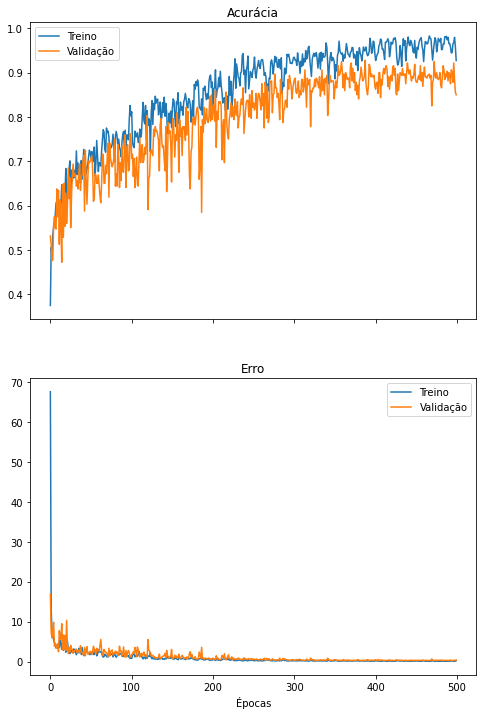

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_categorical_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)


In [ ]:
classe_predita_onehot = model.predict(data_teste)
classe_predita = classe_predita_onehot.argmax(axis=1)

In [ ]:
#Matriz de confusão já com 3 classes:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

matriz_confusao = confusion_matrix(classe_teste, classe_predita, labels=range(4))
print(matriz_confusao)

[[85  7  0  0]
 [ 6 81  9  0]
 [ 0  6 98  2]
 [ 0  0 30 76]]


In [ ]:
#https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print('Precision or positive predictive: %.3f' % precision_score(classe_teste,classe_predita,average='weighted',zero_division=1))
print('Recall or Sensitivity: %.3f' % recall_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Accuracy: %.3f' % accuracy_score(classe_teste, classe_predita))
print('F1 Score: %.3f' % f1_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Precision Recall F1-Score Support for each class:')
#print(precision_recall_fscore_support(lista_classes_originais, lista_classes_preditas,average='weighted',labels=[0,1,2,3]))
precision, recall, fscore, support = precision_recall_fscore_support(classe_teste, classe_predita,
    zero_division=1)
print('precision or positive predictive: {}'.format(precision))
print('recall or sensitivity: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#The diagonal entries are the accuracies of each class
matriz_confusao = matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis]
acuracia_classes = matriz_confusao.diagonal()
print('Accuracy for each class:')
print(acuracia_classes)

print(classification_report(classe_teste, classe_predita, zero_division=1))

Precision or positive predictive: 0.869
Recall or Sensitivity: 0.850
Accuracy: 0.850
F1 Score: 0.851
Precision Recall F1-Score Support for each class:
precision or positive predictive: [0.93406593 0.86170213 0.71532847 0.97435897]
recall or sensitivity: [0.92391304 0.84375    0.9245283  0.71698113]
fscore: [0.92896175 0.85263158 0.80658436 0.82608696]
support: [ 92  96 106 106]
Accuracy for each class:
[0.92391304 0.84375    0.9245283  0.71698113]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93        92
         1.0       0.86      0.84      0.85        96
         2.0       0.72      0.92      0.81       106
         3.0       0.97      0.72      0.83       106

    accuracy                           0.85       400
   macro avg       0.87      0.85      0.85       400
weighted avg       0.87      0.85      0.85       400



Rede Neural para classficar a chance de ataque cardíaco 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/HeartAttack/heart.csv', delimiter=',')
data = np.delete(data,0,axis=0)
classe = data[:,13]
data = np.delete(data,13,axis=1)

data_treino, data_teste, classe_treino, classe_teste = train_test_split(data,classe, test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(numInputs):
  model = Sequential()
  model.add(Dense(numInputs,activation='elu',input_dim=numInputs))
  model.add(Dense(50,activation='tanh'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile('Adam', 'binary_crossentropy', metrics=['accuracy'])
  return model

model = create_model(13)

history = model.fit(data_treino,classe_treino, epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 3ms/step - loss: 1.3098 - accuracy: 0.4587
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 0.8916 - accuracy: 0.4587
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.5455
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5413
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5579
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.5579
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.5950
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6281
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6364
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.6364
Epoch 11/500
8/8 [===========

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)


In [ ]:
import tensorflow as tf

classe_predita = model.predict(data_teste)
classe_predita = tf.round(classe_predita)

In [ ]:
#Matriz de confusão já com 3 classes:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

matriz_confusao = confusion_matrix(classe_teste, classe_predita, labels=range(2))
print(matriz_confusao)

In [ ]:
#https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print('Precision or positive predictive: %.3f' % precision_score(classe_teste,classe_predita,average='weighted',zero_division=1))
print('Recall or Sensitivity: %.3f' % recall_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Accuracy: %.3f' % accuracy_score(classe_teste, classe_predita))
print('F1 Score: %.3f' % f1_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Precision Recall F1-Score Support for each class:')
#print(precision_recall_fscore_support(lista_classes_originais, lista_classes_preditas,average='weighted',labels=[0,1,2,3]))
precision, recall, fscore, support = precision_recall_fscore_support(classe_teste, classe_predita,
    zero_division=1)
print('precision or positive predictive: {}'.format(precision))
print('recall or sensitivity: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#The diagonal entries are the accuracies of each class
matriz_confusao = matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis]
acuracia_classes = matriz_confusao.diagonal()
print('Accuracy for each class:')
print(acuracia_classes)

print(classification_report(classe_teste, classe_predita, zero_division=1))

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('drive/MyDrive/TensorFlow/Models/HeartAttack/80')